## Mini Tests ipynb
used to create graphs and compute calculations that are later introduced in the thesis

In [5]:
## seteamos los parametros del notebook
%autosave 180
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%pylab inline
import sys
import pandas as pd; 
import numpy as np; 
import os;
import random;
import time
import seaborn as sns
palette = sns.color_palette()

np.random.seed(2015)

# for nice long graphic titles
from textwrap import wrap

#seteamos el path de los datos de trabajo

from scipy import interp

Autosaving every 180 seconds
Populating the interactive namespace from numpy and matplotlib


/home/teo/Virtualenvs/dev3.6/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
# set work vars
PROJECTDIR = os.getcwd().split(os.sep)
PROJECTDIR =  os.sep.join(PROJECTDIR[:PROJECTDIR.index('authorea') + 1])
DATADIR = os.path.join(PROJECTDIR,'datasets')

In [6]:
# python version
sys.version

'3.6.3 (default, Oct  6 2017, 08:44:35) \n[GCC 5.4.0 20160609]'


## sklearn specific imports

In [12]:

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.model_selection import label_binarize
from sklearn.preprocessing import (
                                StandardScaler, MinMaxScaler, Binarizer, 
                                    Imputer, OneHotEncoder, PolynomialFeatures
                                        )
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


# from sklearn.model_selection import *
from sklearn.linear_model import (
                    LassoCV, Lasso, SGDClassifier, LinearRegression,
                    LogisticRegressionCV, LogisticRegression, 
)
#from sklearn.multiclass import OneVsRestClassifier



# python libraries versions
sns.__version__, sklearn.__version__, np.__version__, pd.__version__

### plot multiple decision boundaries
for different classifiers

ported from: `http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html`

In [44]:
h = .02  # step size in the mesh

names = [
#     "Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Regresión Logística", "Árbol de Decisión​", "Bosque Aleatorio",   "GradientBoost",
         "Naive Bayes", 
#     "QDA"
]

classifiers = [
#     KNeighborsClassifier(3),
#     SVC(kernel="linear", C=0.025),
#     SVC(gamma=2, C=1),
    LogisticRegression(C=0.01, solver='newton-cg', class_weight='balanced', max_iter=200),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(n_estimators=50, max_depth=4, n_jobs=-1, class_weight='balanced'),
    AdaBoostClassifier(),
    GaussianNB(),
]

num_classifiers = len(classifiers)

In [45]:
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2,
    random_state=1, n_clusters_per_class=1
                          )
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]
num_datasets =  len(datasets)

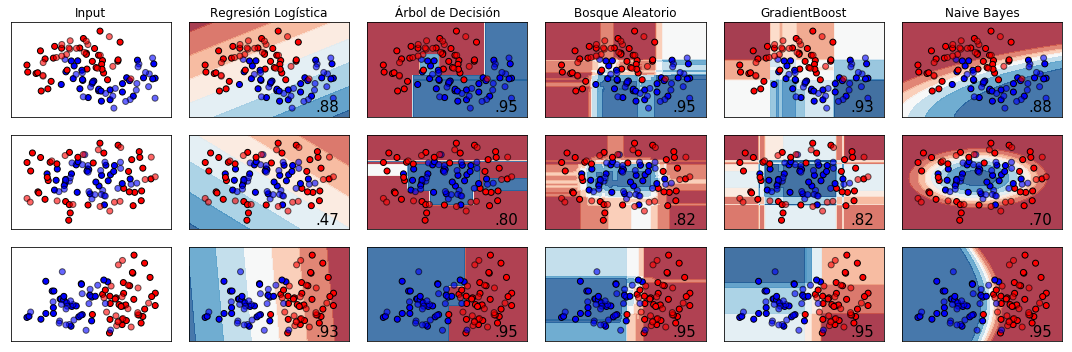

In [46]:
figure = plt.figure(figsize=(num_datasets*num_classifiers, num_classifiers))

title_str = "Fronteras de decisión para distintos clasificadores en distintos datos"
plt.title(title_str,fontsize=20)

i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

# roc curve graph
test differnt plots for roc curves and show the *AUC* for these

### 2 cases
* Good algorithms
* "Random algorithms"

## Technical Requirements to run this script
* 1gb of RAM
* Read module versions after `import`s are done


## Import specific sklearn modules

In [13]:
# Import some data to play with
cancer = datasets.load_breast_cancer()
X_train = cancer.data
y = cancer.target
#y = label_binarize(y, classes=[0, 1,2])

In [ ]:
X_train.shape, y.shape

### random noise

In [ ]:
#random_state.randn


In [ ]:
n_classes = 2#y.shape[1]

# Get new dataset with noisy features to make the problem harder
random_state = pd.np.random.RandomState(0)
n_samples, n_features = X_train.shape
mu, sigma = (40,8) # choose noise deviation
X_noise = pd.np.c_[X_train, mu*np.random.randn(n_samples, 20 * n_features) + sigma]

# Classify on original X

In [ ]:
## split train test

In [ ]:
# shuffle and split training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_train, y, test_size=.2,
                                                    random_state=0)


X_train = pd.DataFrame(X_train) 
X_test = pd.DataFrame(X_test)
#X_test = pd.DataFrame(X_test)

## LOAD 
data from CDRs 

In [ ]:
!ls $DATADIR

In [ ]:
# get_input_ frame 
url = DATADIR + '/data_balanced_sample.csv'
data = pd.read_csv(url)

In [ ]:
data['EPIDEMIC_gt'].sum(),data['EPIDEMIC'].sum()

In [ ]:
data.query('EPIDEMIC==0  ').STATE.value_counts()

# train test split as 
p% of set as validation and the resulting  as train

In [ ]:
split_perc = 0.9
mask = pd.np.random.rand(data.shape[0])< split_perc

val_set = data[mask==0]
data = data[mask==1]


## define our real X_trainvariable and Y vars

exclude/include features. Decide our problem (multi-target, single_target)

In [ ]:
# this param will *force* the exclusion of these columns in the final X_train, no matter what.

manual_exclude_cols = [     
#     'EPIDEMIC',
#      'EPIDEMIC_gt',
#       'STATE',
                ]

iterable=data.columns

comprehensive_exclude_cols = [col for col in iterable if col == 'USER' 
          or ('ANTENNA' in col) ]   
                                
exclude_cols = manual_exclude_cols + comprehensive_exclude_cols
exclude_cols

## Define lables or Y vars

and add to them a set of different possible CASEs/problems to solve

In [ ]:
CASE = 1

## people that used to live in the endemic area
if CASE ==0:
    CASE_TEXT = "people that used to live in the endemic area"
    
    Y_train= data['EPIDEMIC_gt'] == 1
    Y_test = val_set['EPIDEMIC_gt'] == 1
    add_exclusion_cols =[     
            #     'EPIDEMIC',
                 'EPIDEMIC_gt',
#                   'STATE',
                ]
    

## people that used to live in the endemic area *and* migrated
if CASE ==1:
    CASE_TEXT = "people that used to live in the endemic area *and* migrated"
    Y_train= (data['EPIDEMIC_gt'] ==1) & (data['EPIDEMIC'] ==0)
    Y_test = (val_set['EPIDEMIC_gt'] ==1) & (val_set['EPIDEMIC'] ==0)
    add_exclusion_cols = [
#                         'EPIDEMIC',
                          'STATE',
#                          'EPIDEMIC_gt',
                    ]

##  people that migrated in any direction
if CASE ==2:
    CASE_TEXT = "people that migrated in any direction"
    Y_train= data['EPIDEMIC_gt'] != data['EPIDEMIC']
    Y_test = val_set['EPIDEMIC_gt'] != val_set['EPIDEMIC']
    
    add_exclusion_cols = [           
                 'EPIDEMIC',
#                   'EPIDEMIC_gt',
                   'STATE',
]

    
##  people that migrated in any direction, but are currently non-endemic
if CASE ==3:
    CASE_TEXT = "currently non_endemic, that used to live in the endemic area"
    
    data = data[data['EPIDEMIC'] ==0]
    val_set = val_set[val_set['EPIDEMIC'] ==0]

    Y_train= (data['EPIDEMIC_gt'] ==1)
    Y_test = (val_set['EPIDEMIC_gt'] ==1) 
    
    add_exclusion_cols = [
                'EPIDEMIC'
                'EPIDEMIC_gt',
                'STATE',
         
                         ]    
    
## people from the Mexico or DF states
if CASE == 4:
    CASE_TEXT = "people from the Mexico or DF states"
    Y_train= (data['STATE'] == 'Distrito_Federal') | (data['STATE'] == 'Mexico')
    Y_test = (val_set['STATE'] == 'Distrito_Federal') | (val_set['STATE'] == 'Mexico')
    
    add_exclusion_cols = [
                'EPIDEMIC',
                'STATE',
                ]
                        
## people with a HIGH present mobility (>1000 after looking at percentiles of the MOBILITY_DIAMTER)
if CASE == 5:
    val = 1000
    CASE_TEXT = "people with a high mobility during present time (values > {} )".format(val)
    Y_train= (data['MOBILITY_DIAMETER'] > val) 
    Y_test = (val_set['MOBILITY_DIAMETER'] > val) 
    
    add_exclusion_cols = [
        
        'MOBILITY_DIAMETER_WEEKNIGHT',
        'MOBILITY_DIAMETER',
    ]

for col in add_exclusion_cols:
    if not col in exclude_cols:
        exclude_cols+=[col]

In [ ]:
add_exclusion_cols

In [ ]:
# after excluding cols, redefine available cols 
iterable=data.columns

In [ ]:
width = 30
N= pd.np.random.randint(1,int(iterable.shape[0]*1.0/width))
data.columns[(N)*width: (N+1)*width]

In [ ]:
%%time
X_train= data[[col for col in iterable if col not in exclude_cols]].copy()

CASE_TEXT += '. Excluding features: '
for col in exclude_cols:
    CASE_TEXT+= col +', '

X_test = val_set[[col for col in iterable if col not in exclude_cols]].copy()

In [ ]:
iterable=X_train.columns

In [ ]:
# clean negative/Null vals in count cols 
for col in [col for col in iterable if 'COUNT' in col]:
    X_train[col]= X_train[col].apply(lambda x :  x if x>=0 else 0)
    X_test[col]= X_test[col].apply(lambda x :  x if x>=0 else 0)

In [ ]:
X_train.shape, Y_train.shape

## dummy-ize categorical cols
if necessary

In [ ]:
iterable=X_train.columns

In [ ]:
categorical_cols = [
    'STATE'
]

In [ ]:
for col in categorical_cols:
    if col not in exclude_cols:
        print('we are categorizing col %s' %col)
        X_train[col] = X_train[col].astype('category')
    #     if X_train[col].dtype != 'category':
    #         continue 
        X_train= pd.concat([X_train,pd.get_dummies(X_train[col], 
                                          prefix= col, 
                                          prefix_sep='_', 
                                          #sparse = True,
                                          dummy_na=False).astype(pd.np.int8)],\
                  axis=1 ,join = 'inner')
        X_train.drop(col, axis =1 , inplace=True)

        # now onto test_table
        X_test[col] = X_test[col].astype('category')
        X_test = pd.concat([X_test,pd.get_dummies(X_test[col], 
                                          prefix= col, 
                                          prefix_sep='_', 
                                          #sparse = True,
                                          dummy_na=False).astype(pd.np.int8)],\
                  axis=1 ,join = 'inner')

        X_test.drop(col, axis =1 , inplace=True)


## Create Polynomial and/or scaled features
if necessary

In [ ]:
def get_X_files(tables, scaled=False, poly2=False):
    #como input tiene que ir una lista de tables donde la tabla donde se fitea todo viene PRIMERA, i.e. en la pos 0
    #tiene que suceder que haya consistencia entre las columnas de c/dataframe tambien
    train_table = tables[0]
    
    categorical_cols = []
    count_time_cols = [col for col in train_table.columns]
    
    print("First input dataframe is %s big" % str(train_table.shape))
    #print("Test dataframe is %s big" % str(test_table.shape))
    

    
    if scaled ==True :
            min_max_scaler = MinMaxScaler().fit(train_table)
            train_table = min_max_scaler.transform(train_table)
    
    #hacemos interacciones polinomiales sobre las columnas de count/time
    if poly2 == True:
        #pensar que hacer polynomial features es masomenos como agregar nˆ2 nuevas columnas
        #con lo cual tenemos que tener cuidado en no reventar la memoria, ponemor las primeras 50 columnas 
        #como tope para aplicar interacciones polinomiales

        poly2_transform = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
        max_cols = 30

        if  (train_table.shape[1] <= max_cols):
            max_cols = train_table.shape[1]
        poly2_transform.fit(train_table[:,0:max_cols])

        train_table = poly2_transform.transform(train_table[:,0:max_cols])
    
    print("Processed input dataframe is %s big" % str(X_train.shape))
    
    processed_tables = [pd.DataFrame(train_table)]
    
    #aca basicamente replicamos lo anterior pero para todo el resto de las tablas y utilizando los fits que ya tenemos

    for i, table in enumerate(tables):
        # skip the X_train table which comes in the first postion and will behave as our special fitting table
        if i ==0:
            continue  
        #table_categorical = table[categorical_cols].values
        #table_count_time = table[count_time_cols].values
        
        if scaled ==True :
            table = min_max_scaler.transform(table)

        #hacemos interacciones polinomiales sobre las columnas de count/time
        if poly2 == True:
            #pensar que hacer polynomial features es masomenos como agregar nˆ2 nuevas columnas
            #con lo cual tenemos que tener cuidado en no reventar la memoria, ponemor las primeras 50 columnas 
            #como tope para aplicar interacciones polinomiales

            table = poly2_transform.transform(table)
        
        
        
        processed_tables = processed_tables + [pd.DataFrame(table)]
    
    for i in range(len(processed_tables)):    
        print("Table {0} shape is {1}".format( i,str(processed_tables[i].shape)))
#        print("Table %s categorical shape is %s" % str(X_test_categorical.shape))
#        print("Val non-categorical shape is %s" % str(X_test_count_time.shape))
#        print("Val categorical shape is %s" % str(X_test_categorical.shape))
    
    return tuple(processed_tables)
    

In [ ]:
type(X_train), type(X_test)

In [ ]:
do_scale_or_poly = False
if do_scale_or_poly:
    X_train,X_test = get_X_files([X_train,X_test], scaled=True, poly2=False)

In [ ]:
do_correlation = False
if do_correlation:
    corr = pd.DataFrame(X_train).copy()
    target_col = 'target'
    corr[target_col] = Y_train
    corr = corr.corr()
    print(corr.shape)

In [ ]:
if do_correlation:
    view = corr.query('target>0.1')
    # show only those columns which 
    corr_columns = view.index.values

    display(view[corr_columns].head(10))

In [ ]:
## show correlation between state and target
if do_correlation:
    if not 'STATE' in exclude_cols:    
        state_cols = [col for col in corr if 'STATE' in col]
        view = corr[state_cols + [target_col]]
        display(view.query('target > 0.01'))

## class weight check

In [ ]:
a=data['EPIDEMIC_gt'].sum();b= data.shape[0]
a*1.0/b

a=val_set['EPIDEMIC'].sum();b= val_set.shape[0]
a*1.0/b

## Classify on different Xes
(same features are used but noise is added to them)

In [ ]:
# choose approximating function
#method = 'svm'
# method = 'bnb'
# method = 'rf'
# method = 'dtree'
method = 'logit'

In [ ]:
# Learn to predict each class against the other
start_time = time.time()


if method == 'rf':
    
    param_grid = {'kernel':['rbf','linear'], 'C': list(float(10)**pd.np.arange(-2,2)),
                 }
    
    svm_clf = svm.SVC(kernel='linear', probability=True,
                                     random_state=random_state)
    clf =GridSearchCV(svm_clf, param_grid, scoring='roc_auc', fit_params=None, n_jobs=-1, iid=True, refit=True, 
    verbose=2, pre_dispatch='2*n_jobs', error_score='raise')
    
    y_score = clf.fit(X_train, Y_train).predict_proba(X_test)


if method == 'logit':

    param_grid = {'C':[1e3,1e2 ,1e1], # 'fit_prior': [True],
                 }

    lo  = LogisticRegression( )

    clf =GridSearchCV(lo, param_grid, scoring='roc_auc', fit_params=None, n_jobs=-1, iid=True, refit=True, 
    verbose=2, pre_dispatch='2*n_jobs', error_score='raise').fit(X_train, Y_train)
    
    lo = clf.best_estimator_.fit(X_train, Y_train)#.feature_log_prob_(X_test)
    y_score = lo.predict_proba(X_test)
    

if method == 'bnb':

    param_grid = {'alpha':[1e-3, 1e-1], 'fit_prior': [True],
                 }

    mnb  = BernoulliNB( )

    clf =GridSearchCV(mnb, param_grid, scoring='roc_auc', fit_params=None, n_jobs=-1, iid=True, refit=True, 
    verbose=2, pre_dispatch='2*n_jobs', error_score='raise').fit(X_train, Y_train)
    
    mnb = clf.best_estimator_.fit(X_train, Y_train)#.feature_log_prob_(X_test)
    y_score = mnb.predict_proba(X_test)
    
if method == 'rf':
    
    param_grid = {'criterion': ['gini','entropy'], 'n_estimators': [4,5,3],
      'max_features': ["auto",15], #"bootstrap": [True, False],
        "min_samples_leaf": [4,8],'max_depth':[6,8], 
#                   "class_weight": ['balanced']
              }
    rforest  = RandomForestClassifier( )
    clf =GridSearchCV(rforest, param_grid, scoring='roc_auc', fit_params=None, n_jobs=-1, iid=True, refit=True, 
        verbose=3, pre_dispatch='2*n_jobs', error_score='raise').fit(X_train, Y_train)
    
    rforest = clf.best_estimator_.fit(X_train, Y_train)#.feature_log_prob_(X_test)
    y_score = clf.predict_proba(X_test)

    
if method == 'dtree':
    
    param_grid = {'criterion': ['gini'], 'splitter': [#'best',
                                                      'random'],
      'max_features': ["auto"], "min_samples_split": [4,2,],
        "min_samples_leaf": [4],'max_depth':[5,10,8 ], 
                  "class_weight": ['balanced']
              }
    dtree  = DecisionTreeClassifier()
    clf =GridSearchCV(dtree, param_grid, scoring='roc_auc', fit_params=None, n_jobs=-1, iid=True, refit=True, 
        verbose=3, pre_dispatch='2*n_jobs', error_score='raise').fit(X_train, Y_train)
    
    dtree = clf.best_estimator_.fit(X_train, Y_train)#.feature_log_prob_(X_test)
    y_score = clf.predict_proba(X_test)

    
elapsed_time =   time.time() - start_time 
print('Grid Search took %s seconds to run' % (elapsed_time))

print('\n Best estimator params was %s \n' % str(clf.best_estimator_))
print('\n Best estimator score was %s \n' % str(clf.best_score_))

In [ ]:
clf.best_estimator_, clf.best_score_

## Re-Plot ROC curve

In [ ]:
CASE, CASE_TEXT

In [ ]:
lw = 0.8

# Compute ROC curve and ROC area 

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

fpr, tpr, thresholds = roc_curve(Y_test, y_score[:, 1])
mean_tpr += interp(mean_fpr, fpr, tpr)
mean_tpr[0] = 0.0
roc_auc = auc(fpr, tpr)
damper = 0.4
lin_damper = np.linspace(damper,1,len(fpr))

plt.plot(fpr, tpr*lin_damper, lw=lw, color='seagreen',
         label='ROC (area = %0.2f)' % ( roc_auc*damper))

plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
         label='Luck')

mean_tpr /= clf.n_splits_
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
#plt.plot(mean_fpr, mean_tpr, color='r', linestyle='--', label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

title_str = """Receiver operating characteristic (ROC) curve example for Problem 2. 
A Decision Tree learner is Cross Validated on $T$. 
Then the best learner's ROC AUC performance is evaluated on $T_s$ data."""
title_str = '\n'.join(wrap(title_str))
plt.title(title_str, y=1.03, fontsize = 13)

plt.legend(loc="lower right")
plt.show()

# Get HyperGeometric PMF

Given a RF model with $N$ features of which only $K$ are informative and $n$ splits _without_ replacement or $n$ _draws_ from the bag of $N$ features... 

what is the probability of selecting an informative feature?

Let's take a look at some instances of PMFs for the hypergeom  distribution $\mathcal{H}$ .

In [ ]:
#import scipy modules
from scipy.stats import hypergeom

In [ ]:
N = 50
percentage = 0.1
[K,n] = [int(N*percentage), 30]

rv = hypergeom(N,K,n)
x = np.arange(0, n+1)

pmf = rv.pmf(x)
N,K,n

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
aX_train.plot(x, pmf, 'bo')
aX_train.vlines(x, 0, pmf, lw=2)
aX_train.set_xlabel('# of informative features selected for any give split')
aX_train.set_ylabel('hypergeom PMF')
plt.show()

## compute the log loss
if we take $p_i$ the probability that y_i ==1 i.e. that belongs to class 1, then the log loss will be
 
i.e. 
$$- \frac{1}{N} \sum_{i=1}^N [y_{i} \log \, p_{i} + (1 - y_{i}) \log \, (1 - p_{i})].$$

Note that we have discontinuities at $y_i = 0$ and $y_i = 1$, thus we must take care not to let these values be reached. 

In [ ]:
 a = np.random.randn(20)

In [ ]:
a

In [ ]:
eps = 1e-15
pd.np.minimum(a,eps)

In [ ]:
a = pd.np.asarray(4)
a.size

In [ ]:
# define the function with numpy

def log_loss_binary(actual, predicted, eps = 1e-15): 
    actual = pd.np.asarray(actual)
    predicted = pd.np.asarray(predicted)
    rv = None
    # we use eps and 1-eps here to take care of the discontinuity
    predicted = pd.np.minimum(pd.np.maximum(predicted, eps), 1-eps) 
    
    rv = - (pd.np.sum(actual * pd.np.log(predicted) + (1 - actual) * pd.np.log(1 - predicted)) ) / actual.size
    
    return rv

In [ ]:
input_range  = pd.Series(pd.np.linspace(0,0.5, 200)).to_frame()
input_range.columns = ['x']
input_range.head(10)

In [ ]:
input_range['y'] = input_range.apply(lambda x:log_loss_binary(1,x),axis=1)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
# plot histogram on cross validated scores

title_str = "Values of $log\_loss( {\hat{p_i}} )$ where ${\hat{p_i}} = P(y_i=1 \mid \Theta)$."
input_range.plot(x='x',y='y',ax=ax)

plt.title(title_str, fontsize=18)

plt.xlabel("$ p_i $ value".format())
plt.ylabel("Log-loss Score".format())

